In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline
import os
if os.getcwd().endswith('tools'):
    os.chdir('..')

Populating the interactive namespace from numpy and matplotlib


In [35]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler

from MLUtilities.visualization.utils import get_save_button
from MLUtilities.sklearn_extensions.scaling import RobustMinMaxScaler
from MLUtilities.dataset.io import load_data_set, load_features, load_frame_annotations

from tools.local_datasets import get_metadata

import seaborn as sns

import ipywidgets as widgets

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [53]:
dataset = 'CRIM'
meta = get_metadata(dataset)

In [69]:
# dffa = load_data_set(meta, feature_file_suffix='_dau', annotation_file_suffix='_dau')
dffa = load_features(meta, file_suffix='_dau')
dffa = dffa.drop(['subject', 'Confidence', 'Comment'], axis=1, errors='ignore')

dffa = dffa.dropna()


# Label encoder
# le = LabelEncoder().fit(dffa['action'])
# dffa['action'] = le.transform(dffa['action'])
# print 'Found {} classes: {}'.format(len(le.classes_), le.classes_)

# feature columns
feat_cols = [f for f in dffa.columns if f.startswith('Ft_')]
n_features = len(feat_cols)
# label_names = le.classes_
# n_labels = len(label_names)

# label_colors = sns.color_palette('hsv', n_colors=n_labels, desat=.8)
video_names = dffa.index.get_level_values('video').unique().tolist()

print dffa.shape
dffa.head()

(111136, 13)


Ft_P_dcc_dt_mean  Ft_P_dcc_mean  \
video                         frame                                    
012609_A29_Block11_ovtBCfe1_t 548            8.312655     109.697758   
                              549           10.318961     110.108601   
                              550            3.566882     109.976418   
                              551           -2.232497     109.665133   
                              552           -6.322881     109.412218   

                                     Ft_P_n_towards_diff_dt_mean  \
video                         frame                                
012609_A29_Block11_ovtBCfe1_t 548                       0.000000   
                              549                      -0.718593   
                              550                      -4.854964   
                              551                      -3.076351   
                              552                      -2.155500   

                                     Ft_P_n_towards_diff_mean  \
video                         frame                             
012609_A29_Block11_ovtBCfe1_t 548                    1.255214   
                              549                    1.183355   
                              550                    0.883644   
                              551                    0.822719   
                              552                    0.822998   

                                     Ft_P_n_towards_max_dt_mean  \
video                         frame                               
012609_A29_Block11_ovtBCfe1_t 548                      0.992463   
                              549                      1.422004   
                              550                      3.143627   
                              551                      3.036276   
                              552                      2.710563   

                                     Ft_P_n_towards_max_mean  \
video                         frame                            
012609_A29_Block11_ovtBCfe1_t 548                   0.218803   
                              549                   0.280521   
                              550                   0.397462   
                              551                   0.463332   
                              552                   0.571754   

                                     Ft_P_n_towards_min_dt_mean  \
video                         frame                               
012609_A29_Block11_ovtBCfe1_t 548                     -5.283608   
                              549                     -4.135475   
                              550                      1.722521   
                              551                     -0.163445   
                              552                     -1.410008   

                                     Ft_P_n_towards_min_mean  \
video                         frame                            
012609_A29_Block11_ovtBCfe1_t 548                  -0.408804   
                              549                  -0.508382   
                              550                  -0.265271   
                              551                  -0.194843   
                              552                  -0.251244   

                                     Ft_P_phi_n_rel_dt_mean  \
video                         frame                           
012609_A29_Block11_ovtBCfe1_t 548                  0.000000   
                              549                 -1.681185   
                              550                 -9.504895   
                              551                -11.323878   
                              552                -12.121476   

                                     Ft_P_phi_n_rel_mean  \
video                         frame                        
012609_A29_Block11_ovtBCfe1_t 548               4.679677   
                              549               4.511558   
                              550               3.933938   
                   

---

In [55]:
select_features = widgets.SelectMultiple(description='Select features to show:', options=feat_cols, height=200, width=225)
display(widgets.HBox([select_features]))

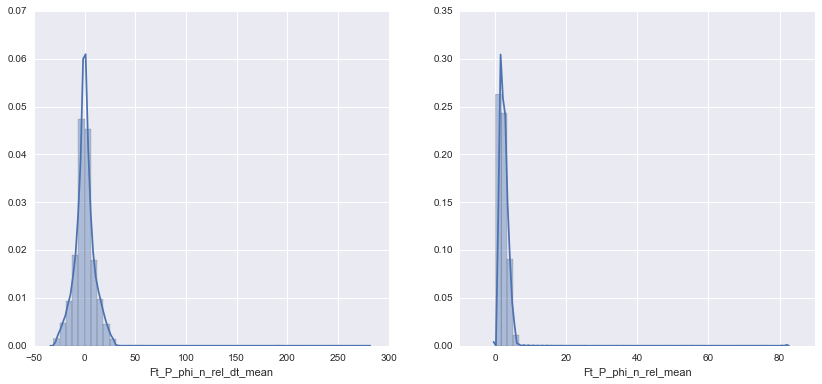

In [70]:
n_selected = len(select_features.value)

wrap = min(3, n_selected)
nrows = n_selected / wrap
ncols = wrap
if nrows * ncols < n_selected:
    nrows += 1
fig, axs = plt.subplots(nrows, ncols, figsize=(14,2+4*nrows))

for ipl, feat in enumerate(select_features.value):
    ax = axs.flat[ipl]
    sns.distplot(dffa.loc[:, feat].iloc[::3], ax=ax)

In [71]:
dffa.loc[:, 'Ft_P_phi_n_rel_mean'].describe()

count    111136.000000
mean          2.062301
std           1.478965
min           0.012937
25%           1.034484
50%           1.908398
75%           2.882300
max          90.006296
Name: Ft_P_phi_n_rel_mean, dtype: float64

In [72]:
dffa.loc[:, 'Ft_P_phi_n_rel_mean'].idxmax()

(u'012909_A29_Block10_castBCma1_t', 12031)

In [73]:
dffa.loc['012909_A29_Block10_castBCma1_t'].tail()

Ft_P_dcc_dt_mean  Ft_P_dcc_mean  Ft_P_n_towards_diff_dt_mean  \
frame                                                                 
12027         -9.529682     336.408070                     0.169749   
12028         -7.621394     336.217476                     0.577892   
12029         -5.714278     336.026960                     6.054015   
12030         -3.808337     335.836524                     7.105464   
12031         -1.903577     335.646166                     4.967616   

       Ft_P_n_towards_diff_mean  Ft_P_n_towards_max_dt_mean  \
frame                                                         
12027                  1.019606                   -0.012427   
12028                  0.861450                   -0.009958   
12029                  0.962933                   -0.007481   
12030                  1.271043                   -0.004996   
12031                  1.767805                   -0.002502   

       Ft_P_n_towards_max_mean  Ft_P_n_towards_min_dt_mean  \
frame                                                        
12027                 0.804086                   -0.182176   
12028                 0.803837                   -0.587850   
12029                 0.803588                   -6.061497   
12030                 0.803338                   -7.110460   
12031                 0.803088                   -4.970118   

       Ft_P_n_towards_min_mean  Ft_P_phi_n_rel_dt_mean  Ft_P_phi_n_rel_mean  \
frame                                                                         
12027                -0.215520              219.317568            42.529377   
12028                -0.057613              246.507476            52.389676   
12029                -0.159345              278.748779            63.539627   
12030                -0.467705              312.851427            76.053684   
12031                -0.964717              348.815302            90.006296   

       Ft_c_n_abs_dt_diff_mean  Ft_c_n_abs_dt_max_mean  Ft_c_n_abs_dt_min_mean  
frame                                                                           
12027                11.847913               11.847913            1.065300e-12  
12028                 9.478331                9.478331            1.065300e-12  
12029                 7.108748                7.108748            7.475354e-13  
12030                 4.739165                4.739165            7.475354e-13  
12031                 2.369583                2.369583            7.475354e-13

In [74]:

dffa.loc[('012909_A29_Block10_castBCma1_t', slice(12000, 12100)), :]

Ft_P_dcc_dt_mean  Ft_P_dcc_mean  \
video                          frame                                    
012909_A29_Block10_castBCma1_t 12000        -79.806335     370.716499   
                               12001        -94.903733     366.920349   
                               12002        -97.428492     363.023210   
                               12003        -88.519640     359.482424   
                               12004        -72.160551     356.596002   
                               12005        -52.362821     354.501489   
                               12006        -34.220642     353.132664   
                               12007        -21.131215     352.287415   
                               12008        -15.053463     351.685277   
                               12009        -14.031625     351.124012   
                               12010        -16.719244     350.455242   
                               12011        -21.028871     349.614087   
                               12012        -25.534941     348.592689   
                               12013        -28.720353     347.443875   
                               12014        -30.541178     346.222228   
                               12015        -30.970429     344.983411   
                               12016        -29.989190     343.783843   
                               12017        -27.980174     342.664636   
                               12018        -25.539166     341.643070   
                               12019        -22.926484     340.726010   
                               12020        -20.305460     339.913792   
                               12021        -17.957225     339.195503   
                               12022        -15.391415     338.579846   
                               12023        -13.293298     338.048114   
                               12024        -11.607393     337.583819   
                               12025        -10.328484     337.170679   
                               12026         -9.535561     336.789257   
                               12027         -9.529682     336.408070   
                               12028         -7.621394     336.217476   
                               12029         -5.714278     336.026960   
                               12030         -3.808337     335.836524   
                               12031         -1.903577     335.646166   

                                      Ft_P_n_towards_diff_dt_mean  \
video                          frame                                
012909_A29_Block10_castBCma1_t 12000                    -3.377541   
                               12001                     5.734206   
                               12002                     5.021452   
                               12003                     2.786930   
                               12004                     1.546413   
                               12005                     0.270740   
                               12006                    -0.152394   
                               12007                    -3.092847   
                               12008                    -6.099853   
                               12009                    -5.831847   
                               12010                    -5.386902   
                               12011                    -5.741618   
                               12012                    -3.725551   
                               12013                    -1.122224   
                               12014                    -0.714554   
                               12015                     2.523871   
                               12016                     5.909946   
                               12017                     7.927387   
                               12018                     0.441659   
                               12019                     7.168615   
                               12020 

In [77]:
from MLUtilities.features.matlab import load_matlab_tracks
matfile = r"E:\Datasets\CRIM13\dset\raw_tracks\012909_A29_Block10_castBCma1_t-track.mat"
dft = load_matlab_tracks(matfile)

In [82]:
dft.loc[12010:12050]

subject   subject_1               subject_2            
feature    X center    Y center    X center    Y center
frame                                                  
12010    127.669295  233.882487  477.296076  202.820708
12011    129.191076  235.277000  476.978676  200.767440
12012           NaN         NaN         NaN         NaN
12013           NaN         NaN         NaN         NaN
12014           NaN         NaN         NaN         NaN
12015           NaN         NaN         NaN         NaN
12016           NaN         NaN         NaN         NaN
12017           NaN         NaN         NaN         NaN
12018           NaN         NaN         NaN         NaN
12019           NaN         NaN         NaN         NaN
12020           NaN         NaN         NaN         NaN
12021           NaN         NaN         NaN         NaN
12022           NaN         NaN         NaN         NaN
12023           NaN         NaN         NaN         NaN
12024           NaN         NaN         NaN         NaN
12025           NaN         NaN         NaN         NaN
12026           NaN         NaN         NaN         NaN
12027           NaN         NaN         NaN         NaN
12028           NaN         NaN         NaN         NaN
12029           NaN         NaN         NaN         NaN
12030           NaN         NaN         NaN         NaN
12031           NaN         NaN         NaN         NaN
12032           NaN         NaN         NaN         NaN
12033           NaN         NaN         NaN         NaN
12034           NaN         NaN         NaN         NaN
12035           NaN         NaN         NaN         NaN
12036           NaN         NaN         NaN         NaN
12037           NaN         NaN         NaN         NaN
12038           NaN         NaN         NaN         NaN
12039           NaN         NaN         NaN         NaN
12040           NaN         NaN         NaN         NaN
12041           NaN         NaN         NaN         NaN
12042           NaN         NaN         NaN         NaN
12043           NaN         NaN         NaN         NaN
12044           NaN         NaN         NaN         NaN
12045           NaN         NaN         NaN         NaN
12046           NaN         NaN         NaN         NaN
12047           NaN         NaN         NaN         NaN
12048           NaN         NaN         NaN         NaN
12049           NaN         NaN         NaN         NaN
12050           NaN         NaN         NaN         NaN

In [97]:
mask = dft.copy()
grp = ((dft.notnull() != dft.shift().notnull()).cumsum())
grp['ones'] = 1
for i in dft.columns:
    print i
    mask[i] = (grp.groupby(level=['subject', 'feature'], axis=1)['ones'].transform('count') < 25) | dft[i].notnull()

('subject_1', 'X center')


ValueError: operands could not be broadcast together with shapes (5,) (13133,) 

In [86]:
grp

subject subject_1          subject_2          ones
feature  X center Y center  X center Y center     
frame                                             
0               1        1         0        0    1
1               1        1         0        0    1
2               1        1         0        0    1
3               1        1         0        0    1
4               1        1         0        0    1
5               1        1         0        0    1
6               1        1         0        0    1
7               1        1         0        0    1
8               1        1         0        0    1
9               1        1         0        0    1
10              1        1         0        0    1
11              1        1         0        0    1
12              1        1         0        0    1
13              1        1         0        0    1
14              1        1         0        0    1
15              1        1         0        0    1
16              1        1         0        0    1
17              1        1         0        0    1
18              1        1         0        0    1
19              1        1         0        0    1
20              1        1         0        0    1
21              1        1         0        0    1
22              1        1         0        0    1
23              1        1         0        0    1
24              1        1         0        0    1
25              1        1         0        0    1
26              1        1         0        0    1
27              1        1         0        0    1
28              1        1         0        0    1
29              1        1         0        0    1
...           ...      ...       ...      ...  ...
13103           5        5         2        2    1
13104           5        5         2        2    1
13105           5        5         2        2    1
13106           5        5         2        2    1
13107           5        5         2        2    1
13108           5        5         2        2    1
13109           5        5         2        2    1
13110           5        5         2        2    1
13111           5        5         2        2    1
13112           5        5         2        2    1
13113           5        5         2        2    1
13114           5        5         2        2    1
13115           5        5         2        2    1
13116           5        5         2        2    1
13117           5        5         2        2    1
13118           5        5         2        2    1
13119           5        5         2        2    1
13120           5        5         2        2    1
13121           5        5         2        2    1
13122           5        5         2        2    1
13123           5        5         2        2    1
13124           5        5         2        2    1
13125           5        5         2        2    1
13126           5        5         2        2    1
13127           5        5         2        2    1
13128           5        5         2        2    1
13129           5        5         2        2    1
13130           5        5         2        2    1
13131           5        5         2        2    1
13132           5        5         2        2    1

[13133 rows x 5 columns]